# Q1. Python Matplotlib Demonstration

In [791]:
%matplotlib inline
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rcParams
from mpl_toolkits import mplot3d
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
rcParams['figure.figsize'] = 8,6

In [792]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [793]:
# Load the data
df = pd.read_csv('Superstore.csv')
df.head()

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,0.01,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,...,0.36,-76,Central,11/18/1951,53,11/9/2018,Regular Air,5,Illinois,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,0.04,10079,Telephone Message Books with Fax/Mobile Sectio...,...,0.39,52,Central,11/19/1951,76,11/12/2016,Regular Air,1,Illinois,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,0.04,11012,"Premium Writing Pencils, Soft, #2 by Central A...",...,0.57,-22,East,3/1/1961,16,11/23/2017,Express Air,2,Connecticut,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,0.10,10646,Fellowes Black Plastic Comb Bindings,...,0.39,-350,West,6/27/1961,65,1/25/2018,Regular Air,8,California,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,0.03,10138,Assorted Color Push Pins,...,0.52,4,West,6/28/1961,19,1/25/2018,Regular Air,1,California,2


# Checking the features of the dataset 

In [794]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             9426 non-null   object 
 1   City                 9426 non-null   object 
 2   Container            9426 non-null   object 
 3   Customer ID          9426 non-null   int64  
 4   Customer Name        9426 non-null   object 
 5   Customer Segment     9426 non-null   object 
 6   Department           9426 non-null   object 
 7   Discount             9426 non-null   float64
 8   Item ID              9426 non-null   int64  
 9   Item                 9426 non-null   object 
 10  Number of Records    9426 non-null   int64  
 11  Order Date           9426 non-null   object 
 12  Order ID             9426 non-null   int64  
 13  Order Priority       9426 non-null   object 
 14  Order Quantity       9426 non-null   int64  
 15  Postal Code          9426 non-null   i

In [795]:
df.dtypes.value_counts()

object     14
int64      10
float64     2
dtype: int64

In [796]:
df.describe(include=['object','int64','float64'])

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
count,9426,9426,9426,9426.000000,9426,9426,9426,9426.000000,9426.000000,9426,...,9426.000000,9426.000000,9426,9426,9426.000000,9426,9426,9426.000000,9426,9426.000000
unique,17,1282,7,NaN,2702,4,3,NaN,NaN,1263,...,NaN,NaN,4,9426,NaN,558,3,NaN,49,NaN
top,Paper,Oxford,Small Box,NaN,Louis Parrish,Corporate,Office Supplies,NaN,NaN,"Global High-Back Leather Tilter, Burgundy",...,NaN,NaN,East,11/18/1951,NaN,2/15/2018,Regular Air,NaN,Texas,NaN
freq,1379,438,4887,NaN,27,3375,5181,NaN,NaN,27,...,NaN,NaN,3099,1,NaN,90,7036,NaN,1029,NaN
mean,NaN,NaN,NaN,1738.422236,NaN,NaN,NaN,0.049628,10734.269998,NaN,...,0.508277,139.233503,NaN,NaN,949.716423,NaN,NaN,12.813601,NaN,88.286123
std,NaN,NaN,NaN,979.167197,NaN,NaN,NaN,0.031798,340.712162,NaN,...,0.141901,998.486307,NaN,NaN,2598.020092,NaN,NaN,17.171179,NaN,281.537536
min,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,0.000000,10001.000000,NaN,...,0.000000,-16477.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,1.000000
25%,NaN,NaN,NaN,898.000000,NaN,NaN,NaN,0.020000,10470.000000,NaN,...,0.380000,-74.000000,NaN,NaN,61.000000,NaN,NaN,3.000000,NaN,6.000000
50%,NaN,NaN,NaN,1750.000000,NaN,NaN,NaN,0.050000,10767.500000,NaN,...,0.520000,3.000000,NaN,NaN,203.000000,NaN,NaN,6.000000,NaN,21.000000
75%,NaN,NaN,NaN,2578.750000,NaN,NaN,NaN,0.080000,11027.000000,NaN,...,0.590000,140.000000,NaN,NaN,776.000000,NaN,NaN,14.000000,NaN,86.000000


In [797]:
# cardinality of each column
df.nunique()

Category                 17
City                   1282
Container                 7
Customer ID            2703
Customer Name          2702
Customer Segment          4
Department                3
Discount                 16
Item ID                1263
Item                   1263
Number of Records         1
Order Date              845
Order ID               6455
Order Priority            5
Order Quantity          112
Postal Code            1496
Product Base Margin      52
Profit                 2221
Region                    4
Row ID                 9426
Sales                  2506
Ship Date               558
Ship Mode                 3
Shipping Cost            86
State                    49
Unit Price              237
dtype: int64

## Checking what kind of values each categorical feature has.

In [798]:
print('\033[1m' + '\033[94m' + 'Category' + '\033[0m : ', df['Category'].unique())
print('\033[1m' + '\033[94m' + 'Customer Segment' + '\033[0m : ',df['Customer Segment'].unique())
print('\033[1m' + '\033[94m' + 'Department' + '\033[0m : ',df['Department'].unique())
print('\033[1m' + '\033[94m' + 'Order Priority' + '\033[0m : ',df['Order Priority'].unique())
print('\033[1m' + '\033[94m' + 'Region' + '\033[0m : ',df['Region'].unique())
print('\033[1m' + '\033[94m' + 'Container Values' + '\033[0m : ',df['Container'].unique())
print('\033[1m' + '\033[94m' + 'Ship Mode' + '\033[0m : ',df['Ship Mode'].unique())
print('\033[1m' + '\033[94m' + 'Number of Records' + '\033[0m : ',df['Number of Records'].unique())


Category :  ['Paper' 'Pens & Art Supplies' 'Binders and Binder Accessories'
 'Rubber Bands' 'Storage & Organization' 'Tables' 'Office Furnishings'
 'Telephones and Communication' 'Labels' 'Appliances' 'Envelopes'
 'Computer Peripherals' 'Chairs & Chairmats' 'Office Machines' 'Bookcases'
 'Scissors, Rulers and Trimmers' 'Copiers and Fax']
Customer Segment :  ['Home Office' 'Corporate' 'Small Business' 'Consumer']
Department :  ['Office Supplies' 'Furniture' 'Technology']
Order Priority :  ['Low' 'Medium' 'Critical' 'Not Specified' 'High']
Region :  ['Central' 'East' 'West' 'South']
Container Values :  ['Small Box' 'Wrap Bag' 'Jumbo Box' 'Medium Box' 'Small Pack' 'Jumbo Drum'
 'Large Box']
Ship Mode :  ['Regular Air' 'Express Air' 'Delivery Truck']
Number of Records :  [1]


# Visualizations 

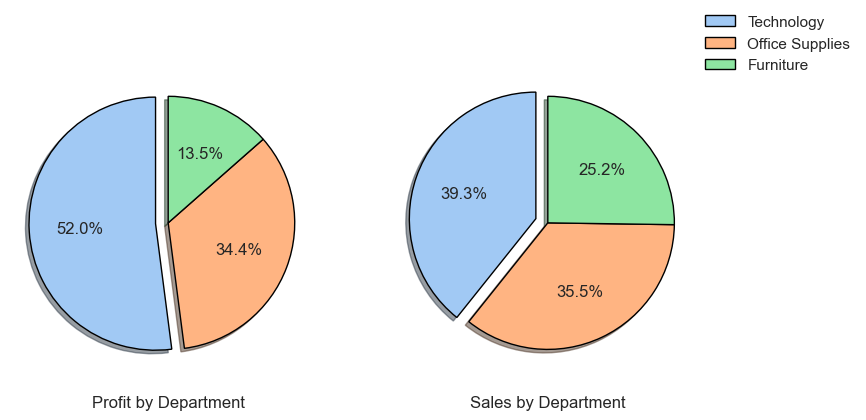

In [799]:
# PIE CHART

top_category = df.groupby('Department')['Profit'].sum().sort_values(ascending=False)
top_category = top_category.reset_index()

top_category_sales = df.groupby('Department')['Sales'].sum().sort_values(ascending=False)
top_category_sales = top_category_sales.reset_index()

fig,ax = plt.subplots(ncols=2)
explode = [0.1,0,0]
label=top_category['Department']
ax[0].pie(top_category['Profit'], wedgeprops = {'edgecolor': 'black'},shadow=True,startangle=90,autopct='%1.1f%%',explode=explode);
ax[0].set_xlabel('Profit by Department');
ax[1].pie(top_category_sales['Sales'], wedgeprops = {'edgecolor': 'black'},shadow=True,startangle=90,autopct='%1.1f%%',explode=explode);
ax[1].set_xlabel('Sales by Department');
ax[1].legend(loc='upper right',labels=label,bbox_to_anchor=(1.5,1.2));
plt.show();





### Technology Department is doing good in terms of Sales and Profit. Furniture Department shows less profits comparitively.

In [800]:
by_dep_reg = df.groupby(['Region','Department'])
by_dep_reg.get_group(('East','Technology'))[['Sales', 'Profit']].max()


Sales     48419
Profit     8798
dtype: int64

<AxesSubplot:ylabel='Region,Department'>

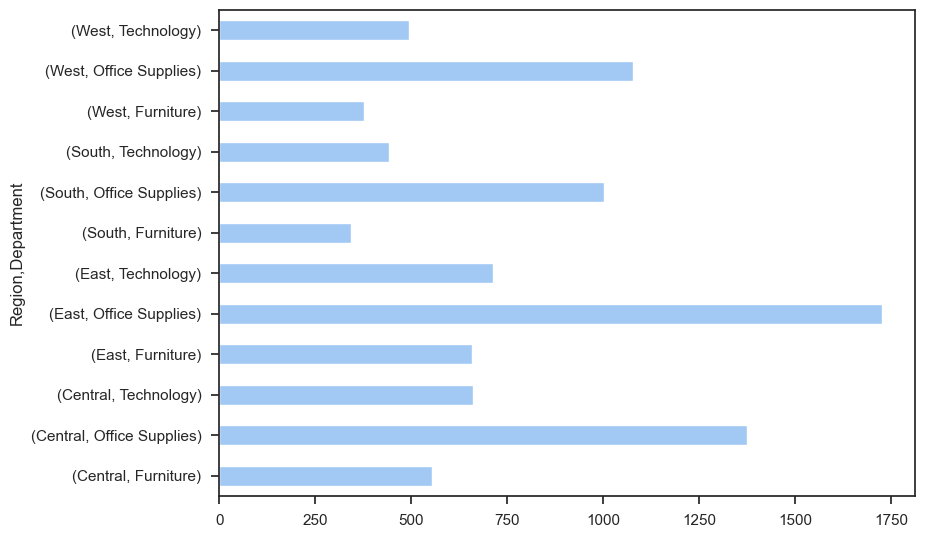

In [801]:
by_dep_reg.size().plot(kind='barh',style='ggplot')

<AxesSubplot:ylabel='Region'>

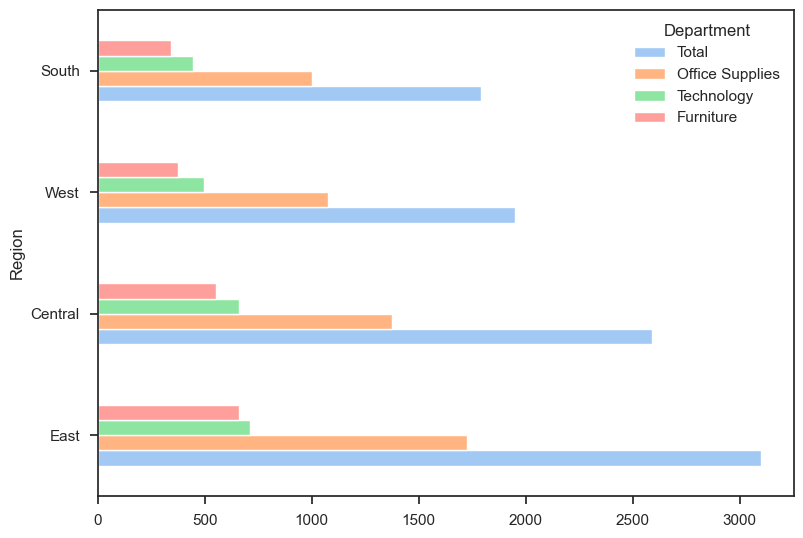

In [802]:
#by_dep_reg.size().unstack().plot(kind='barh',style='ggplot')
by_dep_reg_sz = by_dep_reg.size().unstack()
by_dep_reg_sz['Total'] = by_dep_reg_sz.sum(axis=1)
by_dep_reg_sz = by_dep_reg_sz.sort_values(by='Office Supplies',ascending=False)
by_dep_reg_sz[['Total','Office Supplies','Technology','Furniture']].plot(kind='barh',style='ggplot')

## Out of Total, office supplies are the most in number across all the regions followed by Technology and furniture being the least.

In [803]:
df['Order Date'] = pd.to_datetime(df['Order Date']) #Convert object into Datetime
print(df['Order Date'].min(),df['Order Date'].max())


2014-01-03 00:00:00 2017-12-28 00:00:00


In [804]:
df['Orderyear'] = df['Order Date'].dt.year # creating year and month columns to play around with month and year separately.
df['Ordermonth'] = df['Order Date'].dt.month
print(df['Orderyear'],df['Ordermonth'])

0       2017
1       2015
2       2016
3       2017
4       2017
        ... 
9421    2016
9422    2017
9423    2016
9424    2014
9425    2015
Name: Orderyear, Length: 9426, dtype: int64 0       11
1       11
2       11
3        1
4        1
        ..
9421    12
9422     7
9423    11
9424     7
9425     9
Name: Ordermonth, Length: 9426, dtype: int64


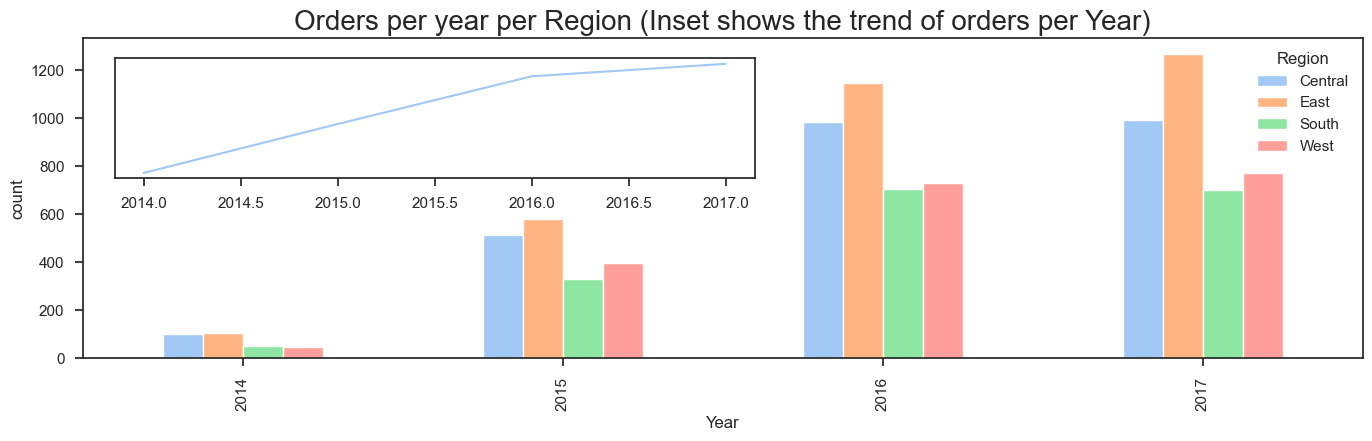

In [805]:
by_date_region = df.groupby(['Orderyear','Region'])
year_reg_sz = by_date_region.size().unstack()

fig = plt.figure(figsize=(16,4))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_title('Orders per year per Region (Inset shows the trend of orders per Year)',fontsize=20)
year_reg_sz.plot(kind='bar',style='seaborn',ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('count')

# 
qty_ord = df.groupby('Orderyear')['Order Quantity'].sum()

## Insertes axes
ax = fig.add_axes([0.12,0.55,0.4,0.3]) #(l,b,w,h)
ax.plot(qty_ord.index,qty_ord,color='b')
ax.set_yticks([]);

## There has been a considerable rise in the number of items that were ordered from 2014 to 2017

## Profit and Loss per Category

In [806]:
# Calculating mean profit of each category

d1 = df.groupby('Category')['Profit'].agg([np.mean])
d1.columns = ['mean_profit']
d1.sort_values('mean_profit')


,mean_profit
Category,
Tables,-179.470297
Bookcases,-37.446602
Rubber Bands,-14.548718
"Scissors, Rulers and Trimmers",-12.503226
Pens & Art Supplies,1.667129
Storage & Organization,13.231148
Paper,25.641769
Labels,54.030395
Computer Peripherals,103.913712


## Normalize profit using z score value



In [807]:
x = d1.loc[:, ['mean_profit']]
# Z score How many standard deviation away from mean
d1['profit_z'] = (x - x.mean()) / x.std()
d1.sort_values('profit_z', inplace=True)
d1.reset_index(inplace=True) #Category 

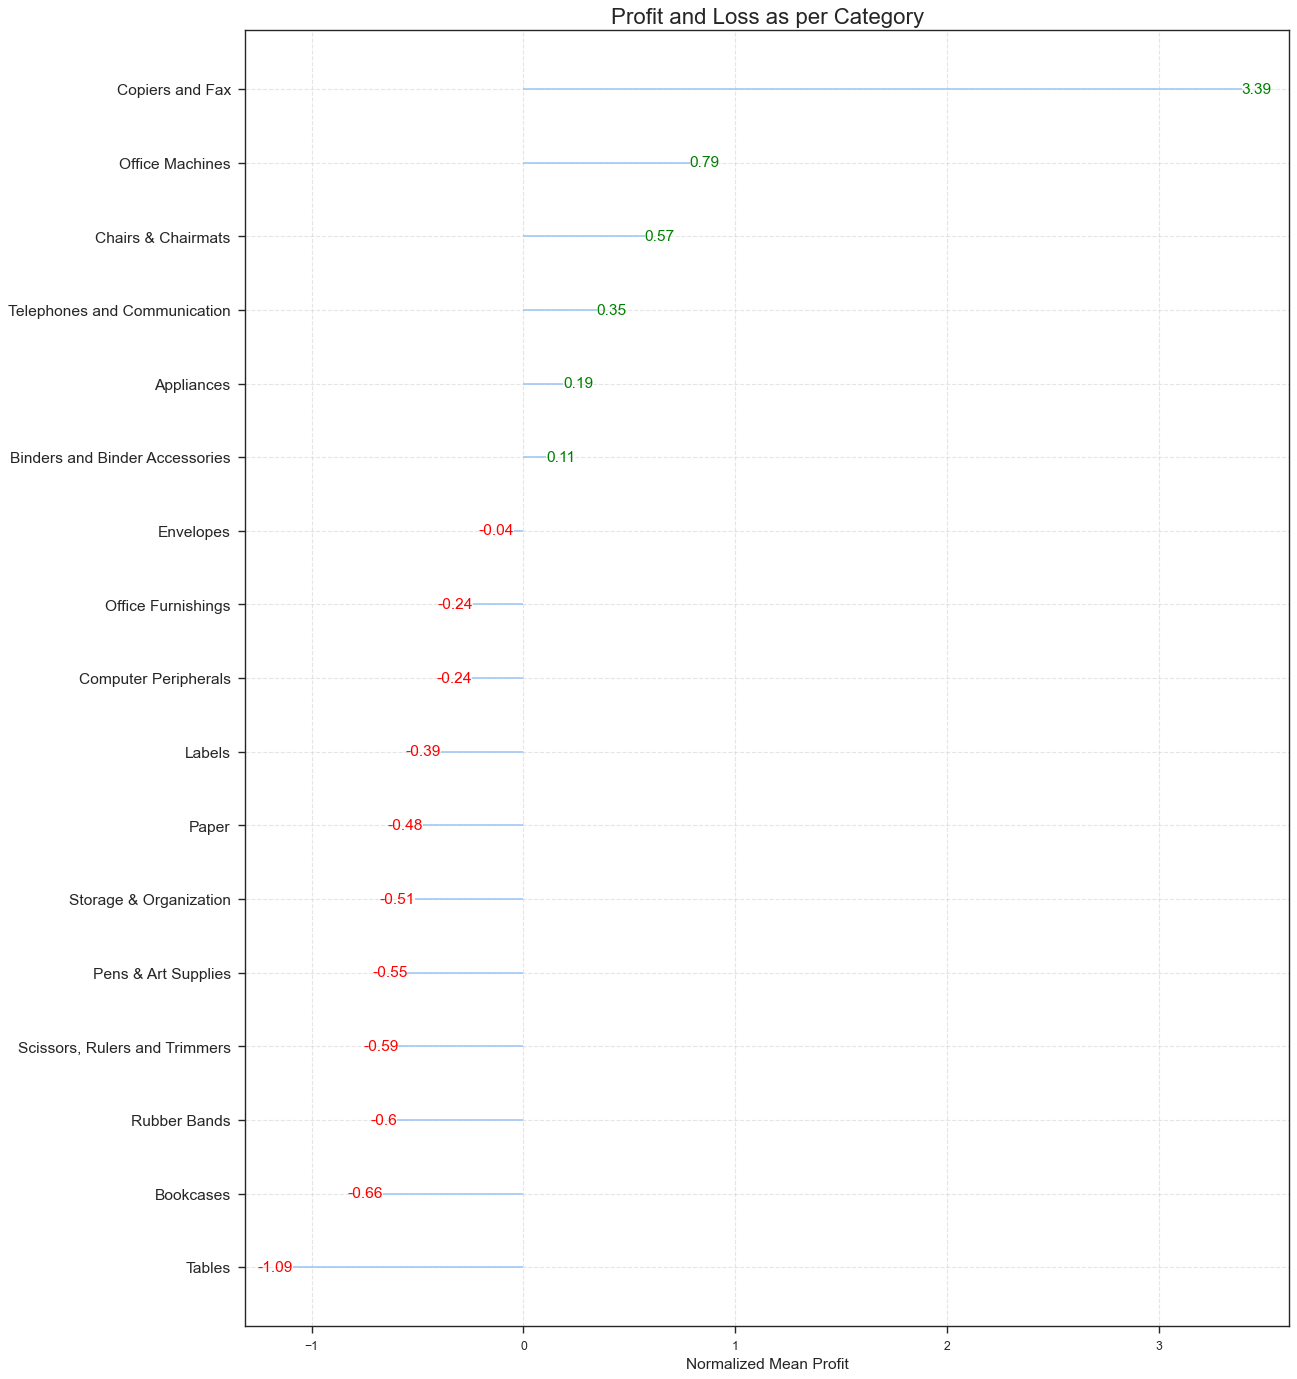

In [808]:
plt.figure(figsize=(15, 20), dpi=80)
plt.hlines(y=d1.index, xmin=0, xmax=d1.profit_z)
for x, y, textval in zip(d1.profit_z, d1.index, d1.profit_z): 
    t = plt.text(x, y, round(textval, 2), horizontalalignment='right' if x < 0 else 'left', verticalalignment='center', fontdict={'color': 'red' if x < 0 else 'green', 'size': 14})
plt.yticks(d1.index, d1.Category, fontsize=14)
plt.title("Profit and Loss as per Category", fontdict={"size": 20})
plt.grid(linestyle = '--', alpha=0.5)
plt.xlabel('Normalized Mean Profit',fontsize=14)
plt.show()

### Copiers and Fax bring in highest profit whereas Tables suffered the highest loss

## Profit and Loss per Customer Segment

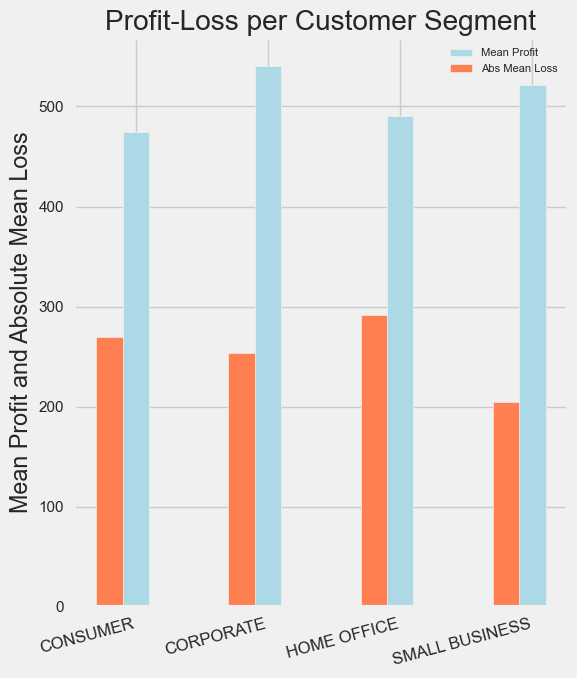

In [809]:
df_loss=df[df['Profit'] < 0]
df_profit=df[df['Profit'] > 0]
df_no_pro_loss = df[df['Profit'] == 0]

dcs_l = df_loss.groupby('Customer Segment')['Profit'].agg([np.mean])
dcs_l.columns = ['mean_loss']
dcs_l.sort_values('mean_loss')
dcs_l['Customer Segment'] = dcs_l.index

dcs_p = df_profit.groupby('Customer Segment')['Profit'].agg([np.mean])
dcs_p.columns = ['mean_profit']
dcs_p.sort_values('mean_profit')

dcs_npl = df_no_pro_loss.groupby('Customer Segment')['Profit'].agg([np.mean])
dcs_npl.columns = ['mean_npl']
dcs_npl.sort_values('mean_npl')
dcs_npl['Customer Segment'] = dcs_npl.index # here entries for no profir loss were 0

plt.style.use('fivethirtyeight')
width = 0.2

fig,ax = plt.subplots(figsize=(6,7))
plt.title('Profit-Loss per Customer Segment')

xlocs = np.arange(0,4,1)
ax.bar(xlocs,dcs_p['mean_profit'],width=width,color='lightblue',label='Mean Profit' )
ax.bar(xlocs-width,abs(dcs_l['mean_loss']),width=width,color='coral',label='Abs Mean Loss' )

ax.set_xticks(xlocs)
ax.set_xticklabels(dcs_l['Customer Segment'].str.upper(), rotation=15, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylabel('Mean Profit and Absolute Mean Loss')
#ax[0].set_ylabel('Profit')

ax.yaxis.grid(True)
ax.legend(loc='best',prop={'size': 8})

plt.tight_layout()
plt.show()


### The small businesses bring in most profits.

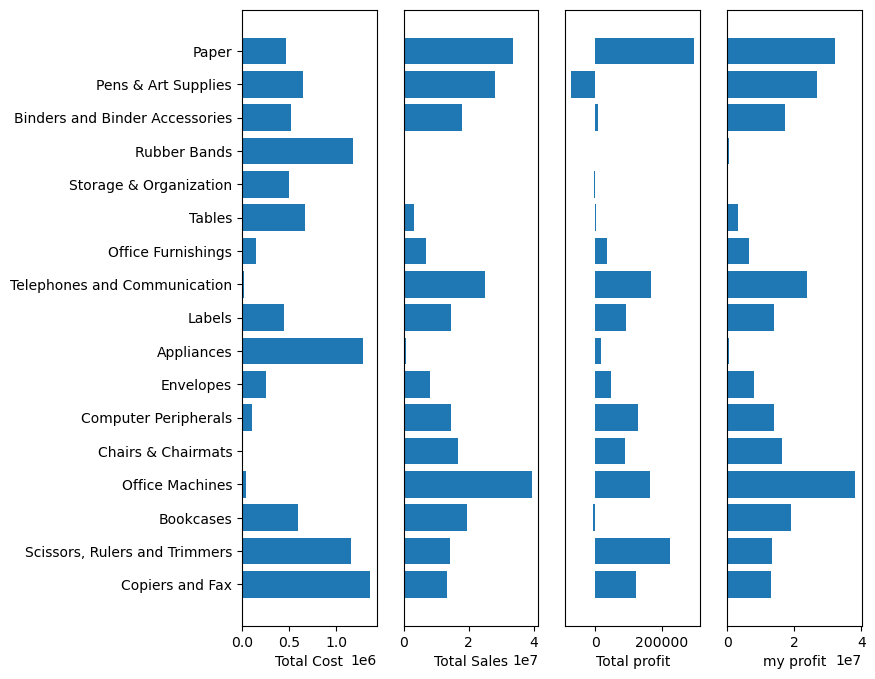

In [810]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mscaler = MinMaxScaler()
std_scaler = StandardScaler()
    
plt.style.use('seaborn')

df_pro = df[['Category','Unit Price','Order Quantity','Shipping Cost','Sales','Profit']]
# Total cost = (Unit price * quantity ordered) + shipping cost
df_pro['Total_cost'] = (df_pro['Unit Price']*df_pro['Order Quantity']) + df_pro['Shipping Cost']
df_pro['Total_sales'] = (df_pro['Order Quantity']*df_pro['Sales'])


d1 = df_pro.groupby('Category')['Profit'].agg([np.sum])
d1.columns = ['total_profit']
d1.sort_values('total_profit')
d1.reset_index(inplace=True) #Category 


d2 = df_pro.groupby('Category')['Total_sales'].agg([np.sum])
d2.columns = ['total_sales']
d2.sort_values('total_sales')
d2.reset_index(inplace=True) #Category 

d3 = df_pro.groupby('Category')['Total_cost'].agg([np.sum])
d3.columns = ['total_cost']
d3.sort_values('total_cost')
d3.reset_index(inplace=True) #Category 

d3['myProfit'] = d2['total_sales'] - d3['total_cost']

categ = pd.Series((i for i in df_pro.Category.unique()))

df_mod = pd.concat([categ,d1.total_profit,d3.myProfit,d2.total_sales,d3.total_cost],axis=1)
df_mod.rename(columns = {0:'Category'}, inplace = True)

#print(df_mod)
#df_mod[['total_profit','total_sales','total_cost']] = mscaler.fit_transform(df_mod[['total_profit','total_sales','total_cost']])
#print(df_mod)

#fig1,ax1 = plt.subplots()
plt.style.use('seaborn')

plt.rcdefaults()
fig, ax = plt.subplots(ncols=4,figsize=(8,8))

y_pos = np.arange(len(df_mod['Category']))

ax[0].barh(y_pos,df_mod['total_cost'], align='center')
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(df_mod['Category'])
ax[0].invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Total Cost')
#ax[0].set_title('Total Cost')

ax[1].barh(y_pos,df_mod['total_sales'], align='center')
ax[1].set_yticks([])
ax[1].set_xlabel('Total Sales')
#ax[1].set_title('Total Sales')

ax[2].barh(y_pos,df_mod['total_profit'], align='center')
ax[2].set_yticks([])
ax[2].set_xlabel('Total profit')
#ax[2].set_title('Total profit')
#plt.title('Comparision of between Total Cost,Sales and Profit',loc='center')

ax[3].barh(y_pos,df_mod['myProfit'], align='center')
ax[3].set_yticks([])
ax[3].set_xlabel('my profit')

plt.show()
########


### Tables are lesser revenue generating product, Pen and Art supplies are also in losses while Computer Peripherals are brining good profit

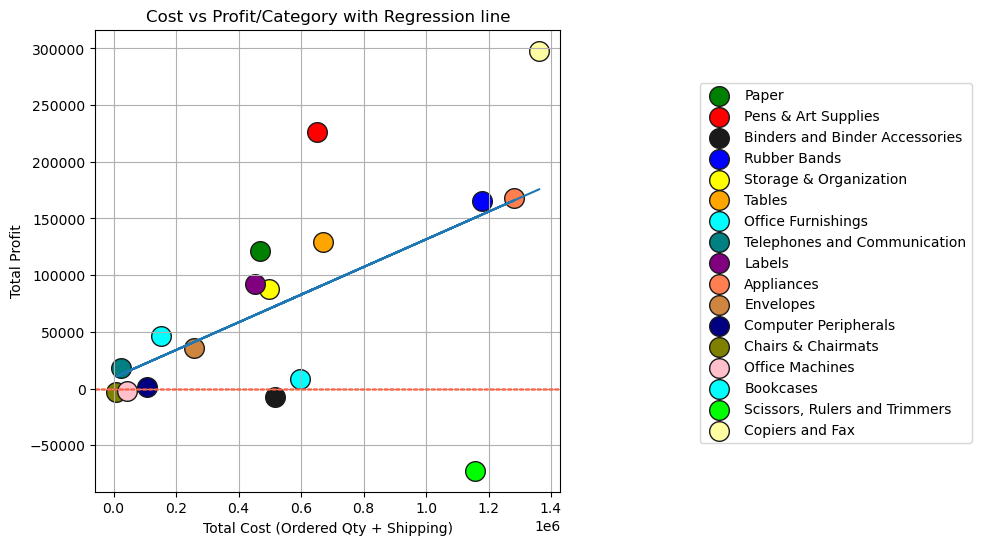

In [811]:

fig, ax4 = plt.subplots(1, 1, figsize=(6, 6))  # setup the plot

cmap = plt.cm.rainbow

colors1 = {'Paper':'green','Pens & Art Supplies':'red','Binders and Binder Accessories':'k',
'Rubber Bands':'blue','Storage & Organization':'yellow','Tables':'orange',
'Office Furnishings':'cyan','Telephones and Communication':'teal','Labels':'purple','Appliances':'coral',
'Envelopes':'peru','Computer Peripherals':'navy', 'Chairs & Chairmats':'olive','Office Machines':'pink',
'Bookcases':'aqua','Scissors, Rulers and Trimmers':'lime','Copiers and Fax':'y'}

for cx, sy,pz, catval in zip(df_mod['total_cost'], df_mod['total_sales'], df_mod['total_profit'],colors1.keys()):
    ax4.scatter(cx, pz,s=200,c=colors1[catval],label=catval,edgecolor='k',cmap=cmap)
    ax4.axhline(0,c='tomato',ls='--',lw=0.8)
    ax4.legend(loc='upper right',bbox_to_anchor=(1.9,0.9))
    #ax4.colorbar()
    ax4.grid(True)
    ax4.set_xlabel('Total Cost (Ordered Qty + Shipping)')
    ax4.set_ylabel('Total Profit')
    ax4.set_title('Cost vs Profit/Category with Regression line') 

m,c =np.polyfit(df_mod['total_cost'],df_mod['total_profit'],1)
ax4.plot(df_mod['total_cost'],m*df_mod['total_cost'] + c)



## Trying 3D graph to see the relationship

In [812]:
by_order_pri = df.groupby(['Order Priority'])['Order Quantity'].agg([np.sum])
by_order_pri.columns = ['TotalQuantity']

by_order_pri['Ord Priority'] = by_order_pri.index
by_order_pri.set_index([pd.Index([0,1, 2, 3, 4])])


,TotalQuantity,Ord Priority
0,25406,Critical
1,27769,High
2,25765,Low
3,24764,Medium
4,26360,Not Specified


In [813]:
by_order_sales = df.groupby(['Order Priority'])['Profit'].agg([np.sum])
by_order_sales.columns = ['Profit']

by_order_sales['Ord Priority'] = by_order_sales.index
by_order_sales.set_index([pd.Index([0,1, 2, 3, 4])])
#by_order_sales.reset_index()

,Profit,Ord Priority
0,191672,Critical
1,388808,High
2,280775,Low
3,251627,Medium
4,199533,Not Specified


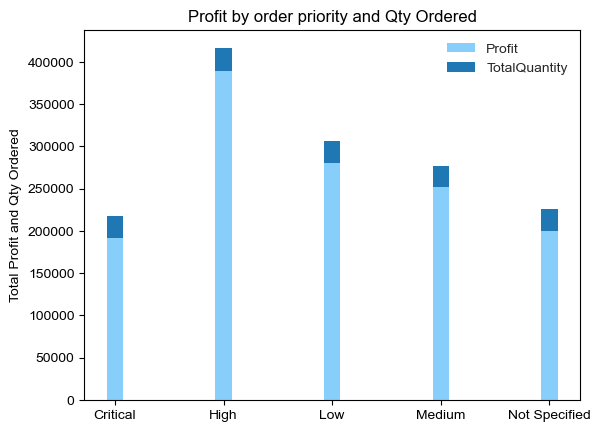

In [814]:
width = 0.15       # the width of the bars

fig, ax = plt.subplots()
plt.style.use('seaborn')

ax.bar(by_order_sales['Ord Priority'], by_order_sales['Profit'], width, label='Profit',color='lightskyblue')
ax.bar(by_order_sales['Ord Priority'], by_order_pri['TotalQuantity'], width, bottom=by_order_sales['Profit'],
       label='TotalQuantity')

ax.set_ylabel('Total Profit and Qty Ordered')
ax.set_title('Profit by order priority and Qty Ordered')
ax.legend()

plt.show()


### High Priority Orders fetch higher profits

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                 Ord Priority  TotalQuantity    Profit
Order Priority                                        
Critical             Critical          25406  0.000000
High                     High          27769  1.000000
Low                       Low          25765  0.451987
Medium                 Medium          24764  0.304130
Not Specified   Not Specified          26360  0.039876


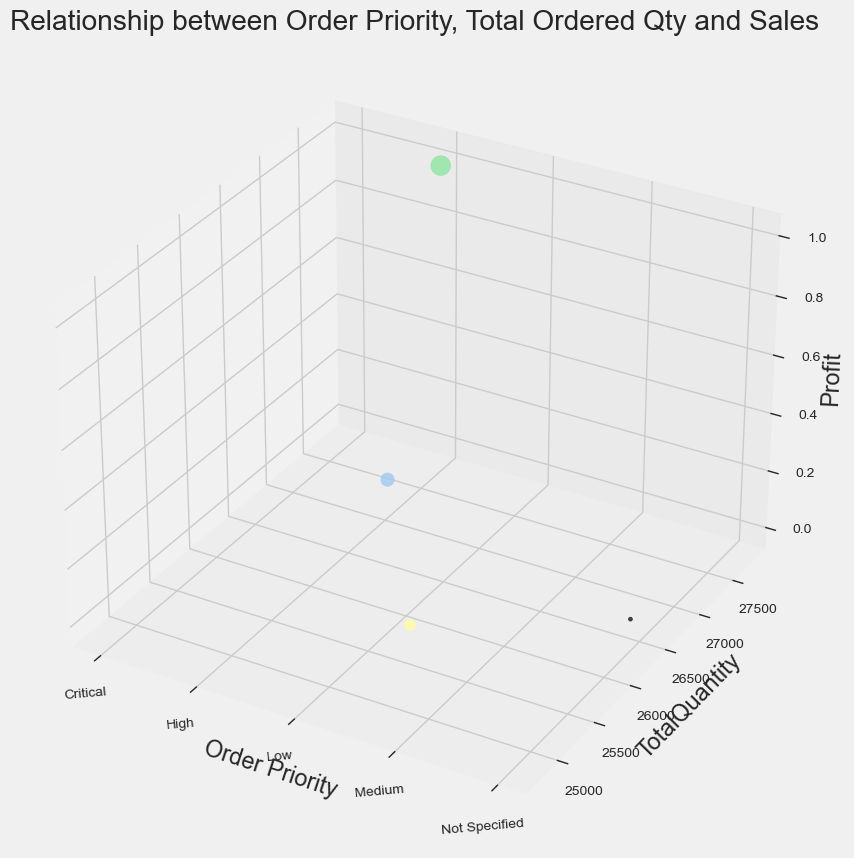

In [815]:
mscaler = MinMaxScaler()
std_scaler = StandardScaler()

x = [0,1,2,3,4]

df_mod1 = pd.concat([by_order_pri['Ord Priority'],by_order_pri['TotalQuantity'],by_order_sales['Profit']],axis=1)
df_mod1[['Profit']] = mscaler.fit_transform(df_mod1[['Profit']])
print(df_mod1)

color = {'Critical':'r','High':'g','Low':'b','Medium':'y','Not Specified':'o'}
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(x, df_mod1['TotalQuantity'], df_mod1['Profit'], 
              c=['r','g','b','y','k'],s = df_mod1['Profit']*200, alpha = 0.8) #c = color[df_mod1['Ord Priority']],

ax.set_xlabel("Order Priority")
ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(by_order_pri['Ord Priority'],rotation=5)
ax.set_ylabel("TotalQuantity")
ax.set_zlabel("Profit")
ax.legend()
ax.set_title("Relationship between Order Priority, Total Ordered Qty and Sales");
plt.show();

## How the sales were for all the departments over the years 

In [816]:
ofc_sup = df.loc[df['Department'] == 'Office Supplies']
Frntr = df.loc[df['Department'] == 'Furniture']
Tech = df.loc[df['Department'] == 'Technology']

In [817]:
ofc_sup = ofc_sup[['Order Date','Sales']]
ofc_sup.head()
ofc_sup = ofc_sup.sort_values('Order Date')

# Summing Sales per date
ofc_sup = ofc_sup.groupby('Order Date')['Sales'].sum().reset_index()
ofc_sup.head()



,Order Date,Sales
0,2014-01-03,58
1,2014-01-04,29
2,2014-01-05,1887
3,2014-01-10,151
4,2014-01-11,515


In [818]:
ofc_sup = ofc_sup.set_index('Order Date')
ofc_sup.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-10',
               '2014-01-11', '2014-01-20', '2014-01-30', '2014-02-01',
               '2014-02-02', '2014-02-05',
               ...
               '2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28'],
              dtype='datetime64[ns]', name='Order Date', length=742, freq=None)

In [819]:
Frntr = Frntr[['Order Date','Sales']]
Frntr.head()
Frntr = Frntr.sort_values('Order Date')
Frntr = Frntr.groupby('Order Date')['Sales'].sum().reset_index()
Frntr.head()


,Order Date,Sales
0,2014-01-03,344
1,2014-01-06,6969
2,2014-01-09,918
3,2014-01-11,144
4,2014-01-12,33


In [820]:
Frntr = Frntr.set_index('Order Date')
Frntr.index

DatetimeIndex(['2014-01-03', '2014-01-06', '2014-01-09', '2014-01-11',
               '2014-01-12', '2014-01-19', '2014-01-21', '2014-01-25',
               '2014-01-30', '2014-02-02',
               ...
               '2017-12-15', '2017-12-16', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-25',
               '2017-12-26', '2017-12-27'],
              dtype='datetime64[ns]', name='Order Date', length=585, freq=None)

In [821]:
Tech = Tech[['Order Date','Sales']]
Tech.head()
Tech = Tech.sort_values('Order Date')
Tech = Tech.groupby('Order Date')['Sales'].sum().reset_index()


In [822]:
Tech = Tech.set_index('Order Date')
Tech.index


DatetimeIndex(['2014-01-06', '2014-01-08', '2014-01-10', '2014-01-23',
               '2014-01-25', '2014-02-03', '2014-02-05', '2014-02-07',
               '2014-02-13', '2014-02-14',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28'],
              dtype='datetime64[ns]', name='Order Date', length=615, freq=None)

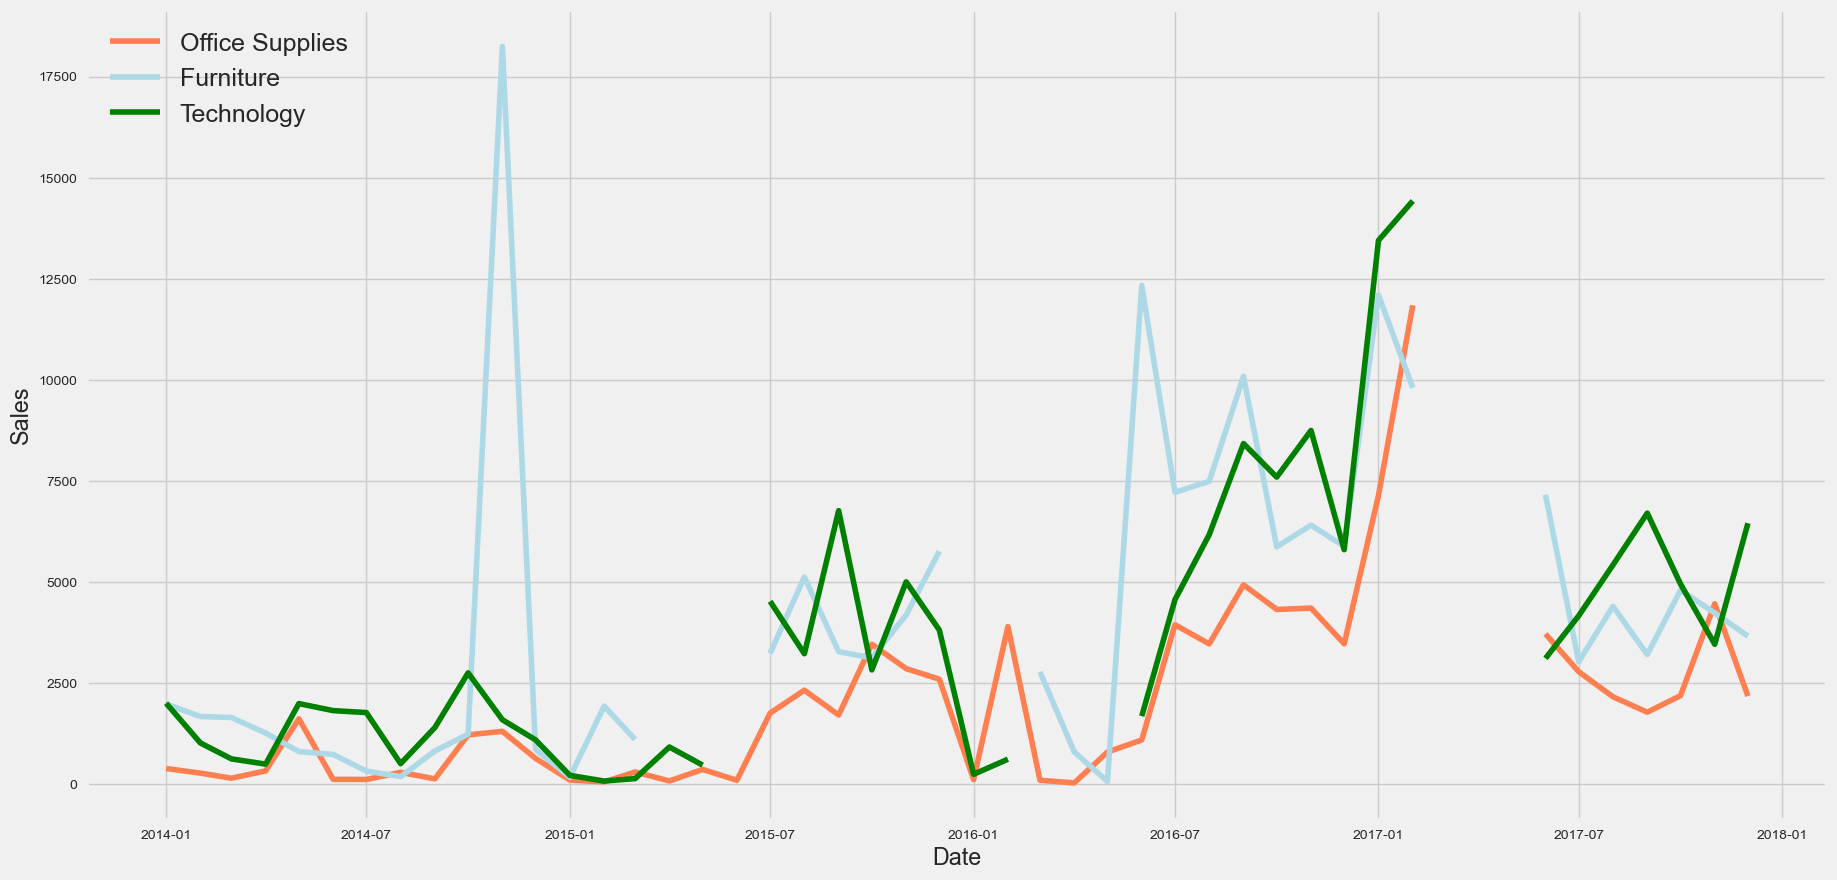

In [823]:


monthly1 = ofc_sup['Sales'].resample('MS').mean()
monthly2 = Frntr['Sales'].resample('MS').mean()
monthly3 = Tech['Sales'].resample('MS').mean()

#print(monthly1,monthly2,monthly3)
fig, ax = plt.subplots(figsize=(20,10),sharex=True)
ax.plot(monthly1.index,monthly1,c='coral',label='Office Supplies')
ax.plot(monthly2.index,monthly2,c='lightblue',label='Furniture')
ax.plot(monthly3.index,monthly3,c='green',label = 'Technology')
ax.set_xlabel('Date')

ax.legend(loc='upper left',fontsize=18)

plt.ylabel('Sales',loc='center')


plt.show()

### Trend - There was an unusal spike in the sales of Furniture in the later part of 2014.Except this spike, all the department starting off slow, Technology department has  generally been performing better in terms of revenue generation than the other two departments.No data is present for March,Apr,May months of 2017.

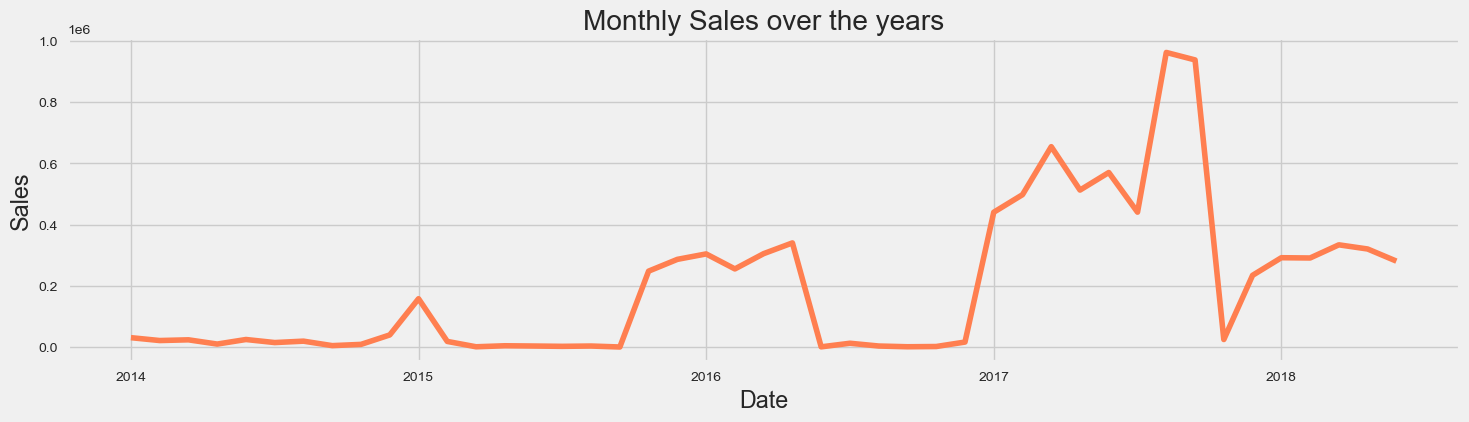

In [824]:
fig, ax = plt.subplots(figsize=(16,4),sharex=True)

monthly_s = pd.DataFrame(df.groupby([df['Orderyear'], df['Ordermonth']])['Sales'].agg(np.sum).reset_index(name='Sales'))
#print(monthly_s)
ax.plot(monthly_s.index,monthly_s['Sales'],c='coral')

ax.set_xlabel('Date')

ax.set_title('Monthly Sales over the years')

plt.ylabel('Sales',loc='center')

fig.canvas.draw()

#print(len(ax.get_xticklabels()))
label = ['2014','2015','2016','2017','2018','2019','2020']
labels = [item.get_text() for item in ax.get_xticklabels()]
#print(labels,'a')
j=0
for i in labels:
    while(j<=5):
        #print(j)
        j+= 1
        #print(j,labels[j],label[j])
        labels[j] = label[j-1]
        ax.set_xticklabels(labels)
        
plt.show();

### There is a general upward trend in the sales over these years and interestingly later part of the years show spikes in sale.Probably due to Thanksgiving amd Christmas holidays

# Q2) Using Pandas give insights

## Regions with their revenues

In [825]:
best_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(10)
best_region = best_region.reset_index()

#Generating the labels which will show the sales value in K figure
best_region['SalesK'] = ['$ '+str(round(int(v)/1000))+' K' for v in best_region.Sales]
best_region


,Region,Sales,SalesK
0,East,3143122,$ 3143 K
1,Central,2294603,$ 2295 K
2,West,2002353,$ 2002 K
3,South,1511949,$ 1512 K


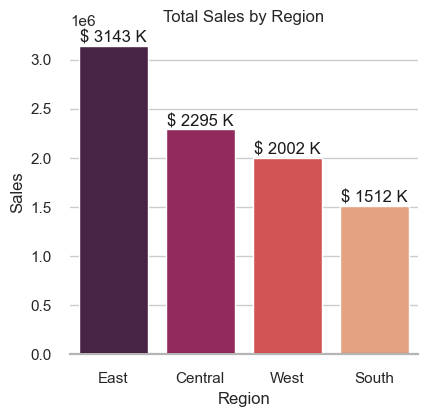

In [826]:
sn.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(4,4))
sn.barplot(x=best_region.Region, y=best_region.Sales, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Total Sales by Region')

def autolabel(rects):
    i=0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.0 * height,
                best_region.SalesK[i],
                ha='center', va='bottom', rotation=0, color='k')
        i += 1

autolabel(ax.patches)
sn.despine(left=True)

### East is the top performing region whereas south is at the bottom.

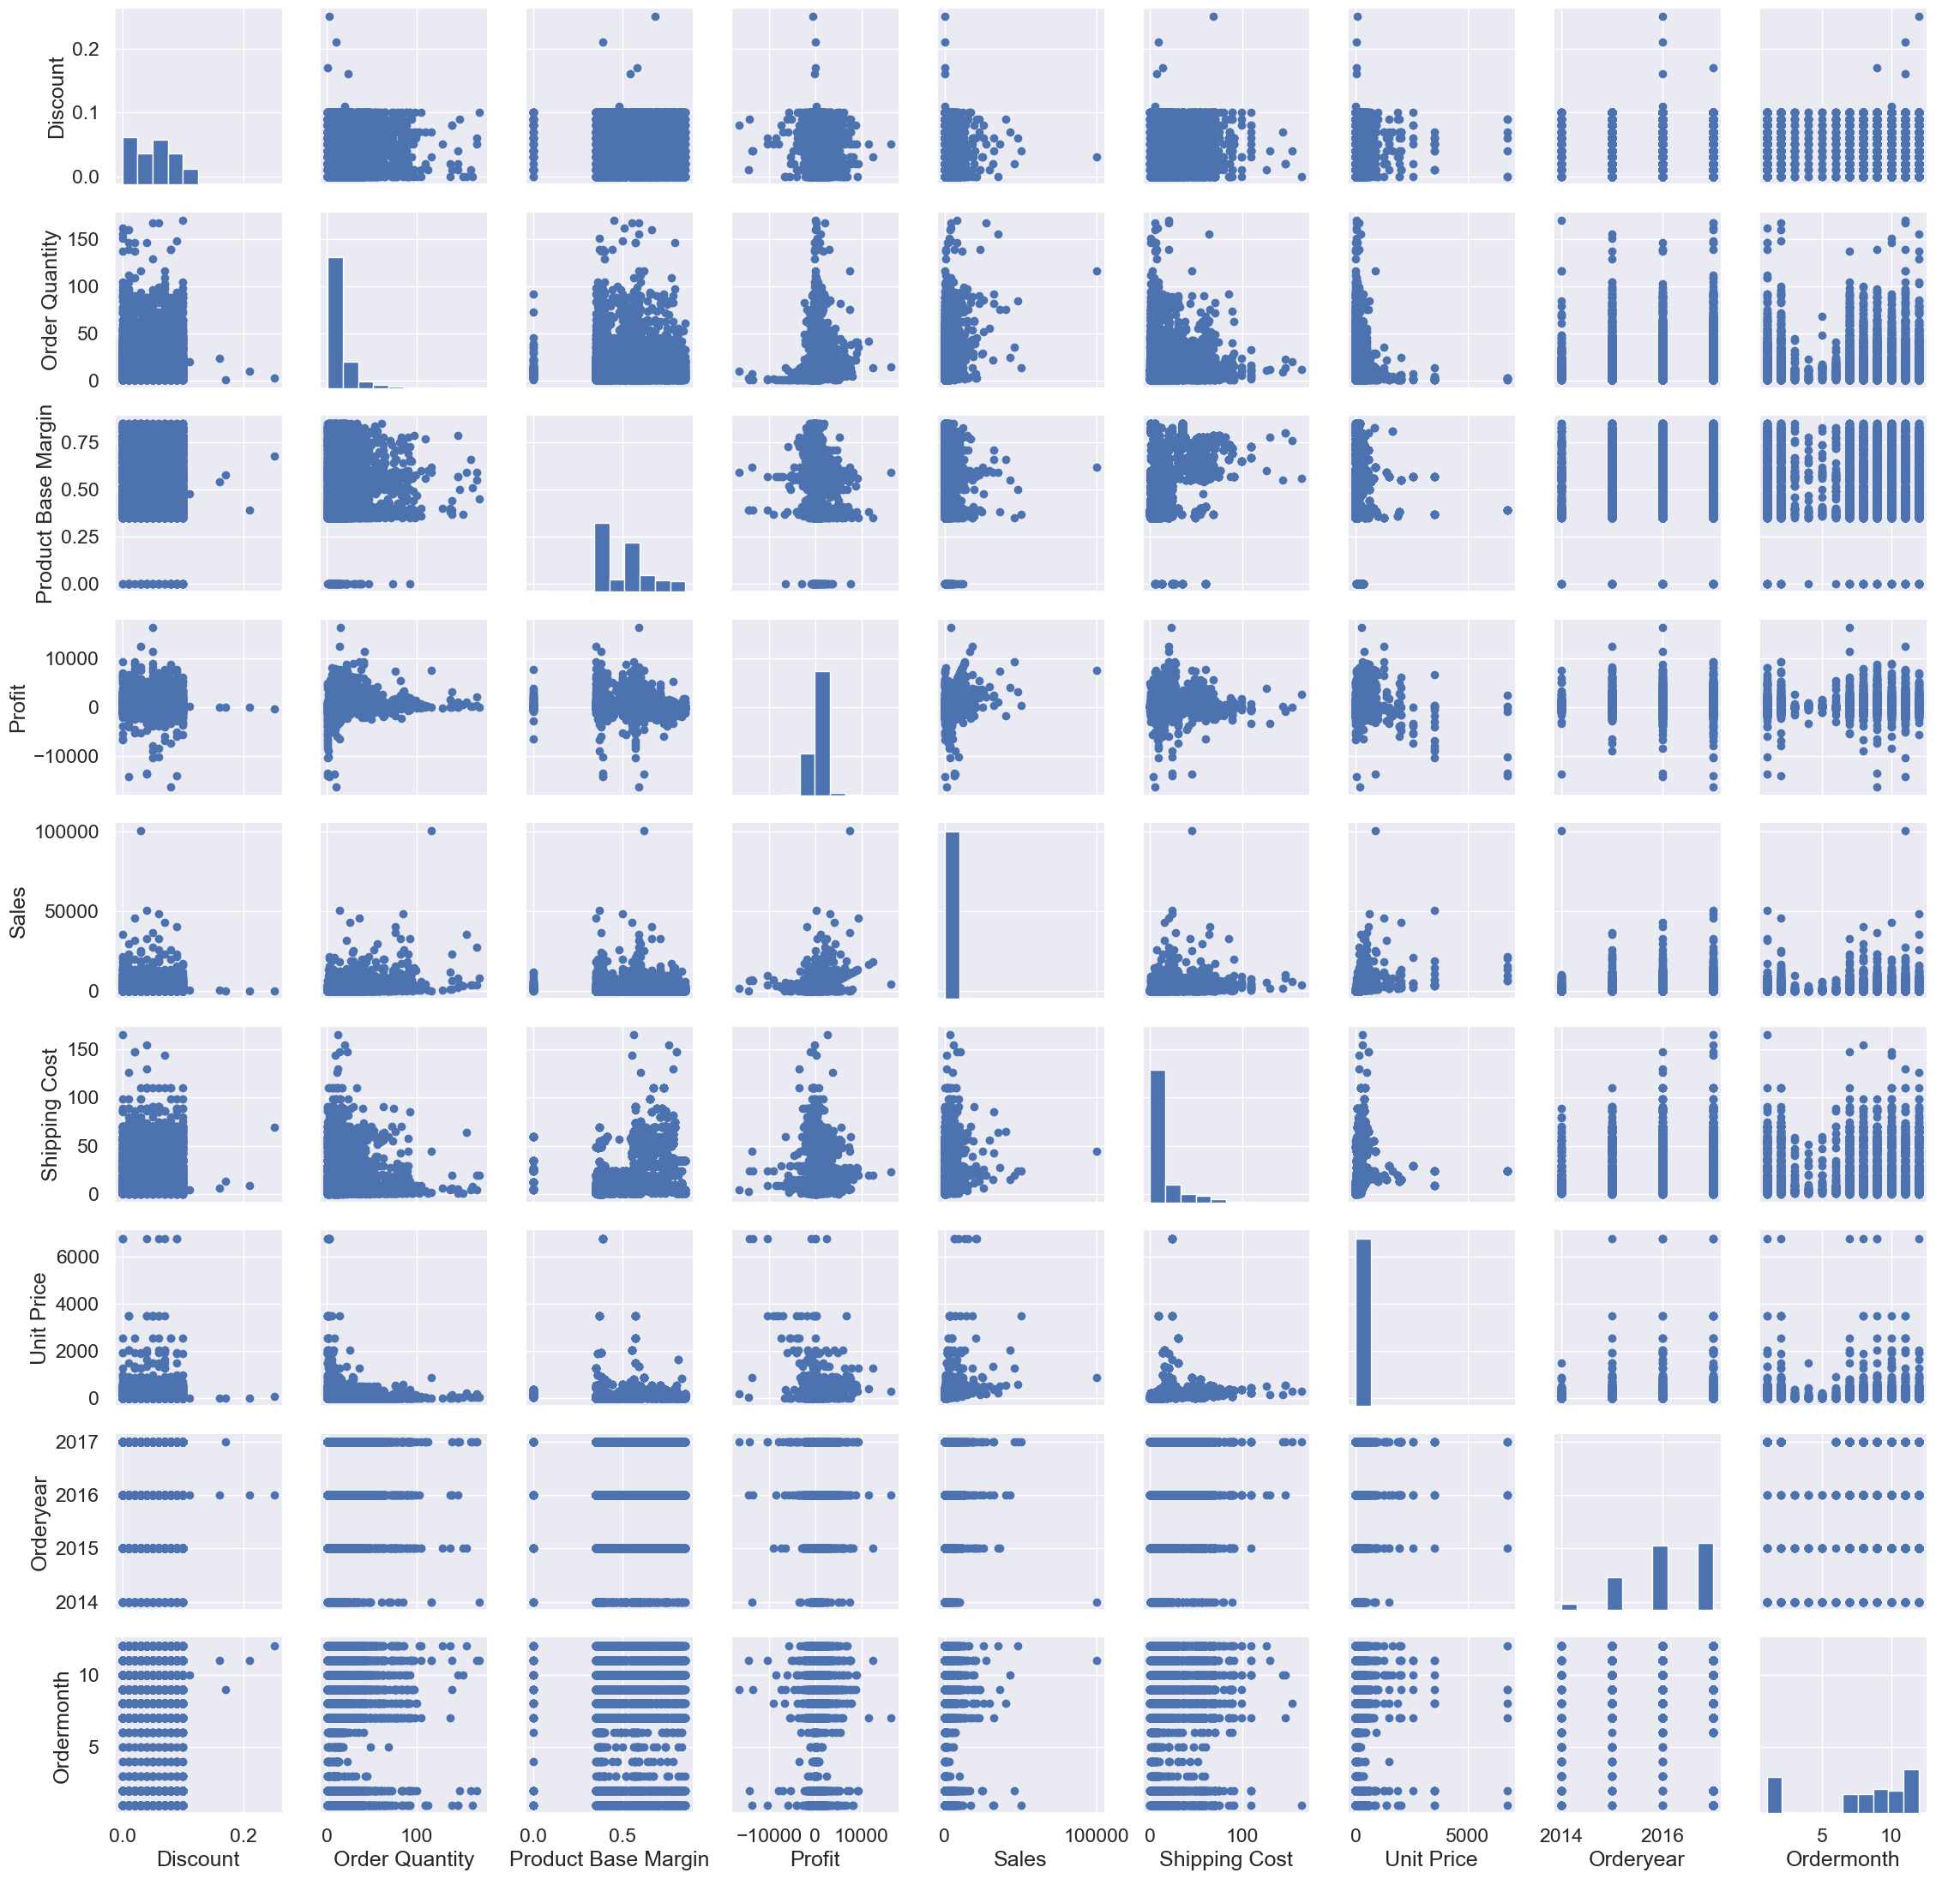

In [827]:
df_clean = df.drop(columns = ['Customer ID','Item ID','Order ID','Number of Records','Postal Code'])

sn.set(font_scale=1.5)
hue="Department"
g = sn.PairGrid(df_clean )#, size=6, aspect=1) #seaborn library we pair each kind of feature with each other.
g = g.map_upper(sn.scatterplot)
g = g.map_diag(plt.hist) # here diagonal is specified to be drawn as histogram
g.map_offdiag(plt.scatter)
g.add_legend();

# Checking correlation between different features

In [828]:
df_clean.corr()

,Discount,Order Quantity,Product Base Margin,Profit,Sales,Shipping Cost,Unit Price,Orderyear,Ordermonth
Discount,1.000000,-0.014062,-0.002204,-0.039467,-0.021285,-0.002218,0.001104,0.010487,0.002627
Order Quantity,-0.014062,1.000000,-0.001695,0.124924,0.360122,-0.019826,-0.054410,-0.005593,-0.006235
Product Base Margin,-0.002204,-0.001695,1.000000,-0.074929,0.097572,0.333864,0.051063,-0.005998,-0.009250
Profit,-0.039467,0.124924,-0.074929,1.000000,0.371578,-0.017472,-0.048541,-0.018359,0.016286
Sales,-0.021285,0.360122,0.097572,0.371578,1.000000,0.310059,0.433990,-0.002425,0.001620
Shipping Cost,-0.002218,-0.019826,0.333864,-0.017472,0.310059,1.000000,0.245593,0.001877,0.007056
Unit Price,0.001104,-0.054410,0.051063,-0.048541,0.433990,0.245593,1.000000,0.019391,-0.013636
Orderyear,0.010487,-0.005593,-0.005998,-0.018359,-0.002425,0.001877,0.019391,1.000000,-0.403247
Ordermonth,0.002627,-0.006235,-0.009250,0.016286,0.001620,0.007056,-0.013636,-0.403247,1.000000


### There isn't much of a correlation between the features.The highest correlation is between Unit Price and Sales Price of 43% which is average but is intuitively correct also as Unit price of an item will have increased sales price as well

## Check How Shipping mode affects shipping cost

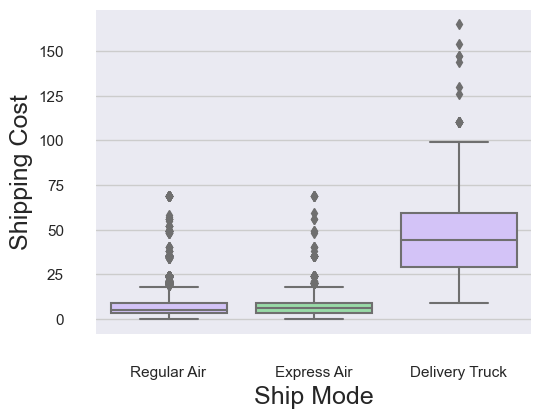

In [829]:
f,ax=plt.subplots(figsize=(5,4))
sn.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sn.boxplot(x='Ship Mode', y="Shipping Cost", palette=["m", "g"],
            data=df)
sn.despine(offset=10, trim=True)

### Shipping through Delivery Truck is way higher than via airplane. 

## Checking which container is carried by what shipping mode and its cost range.

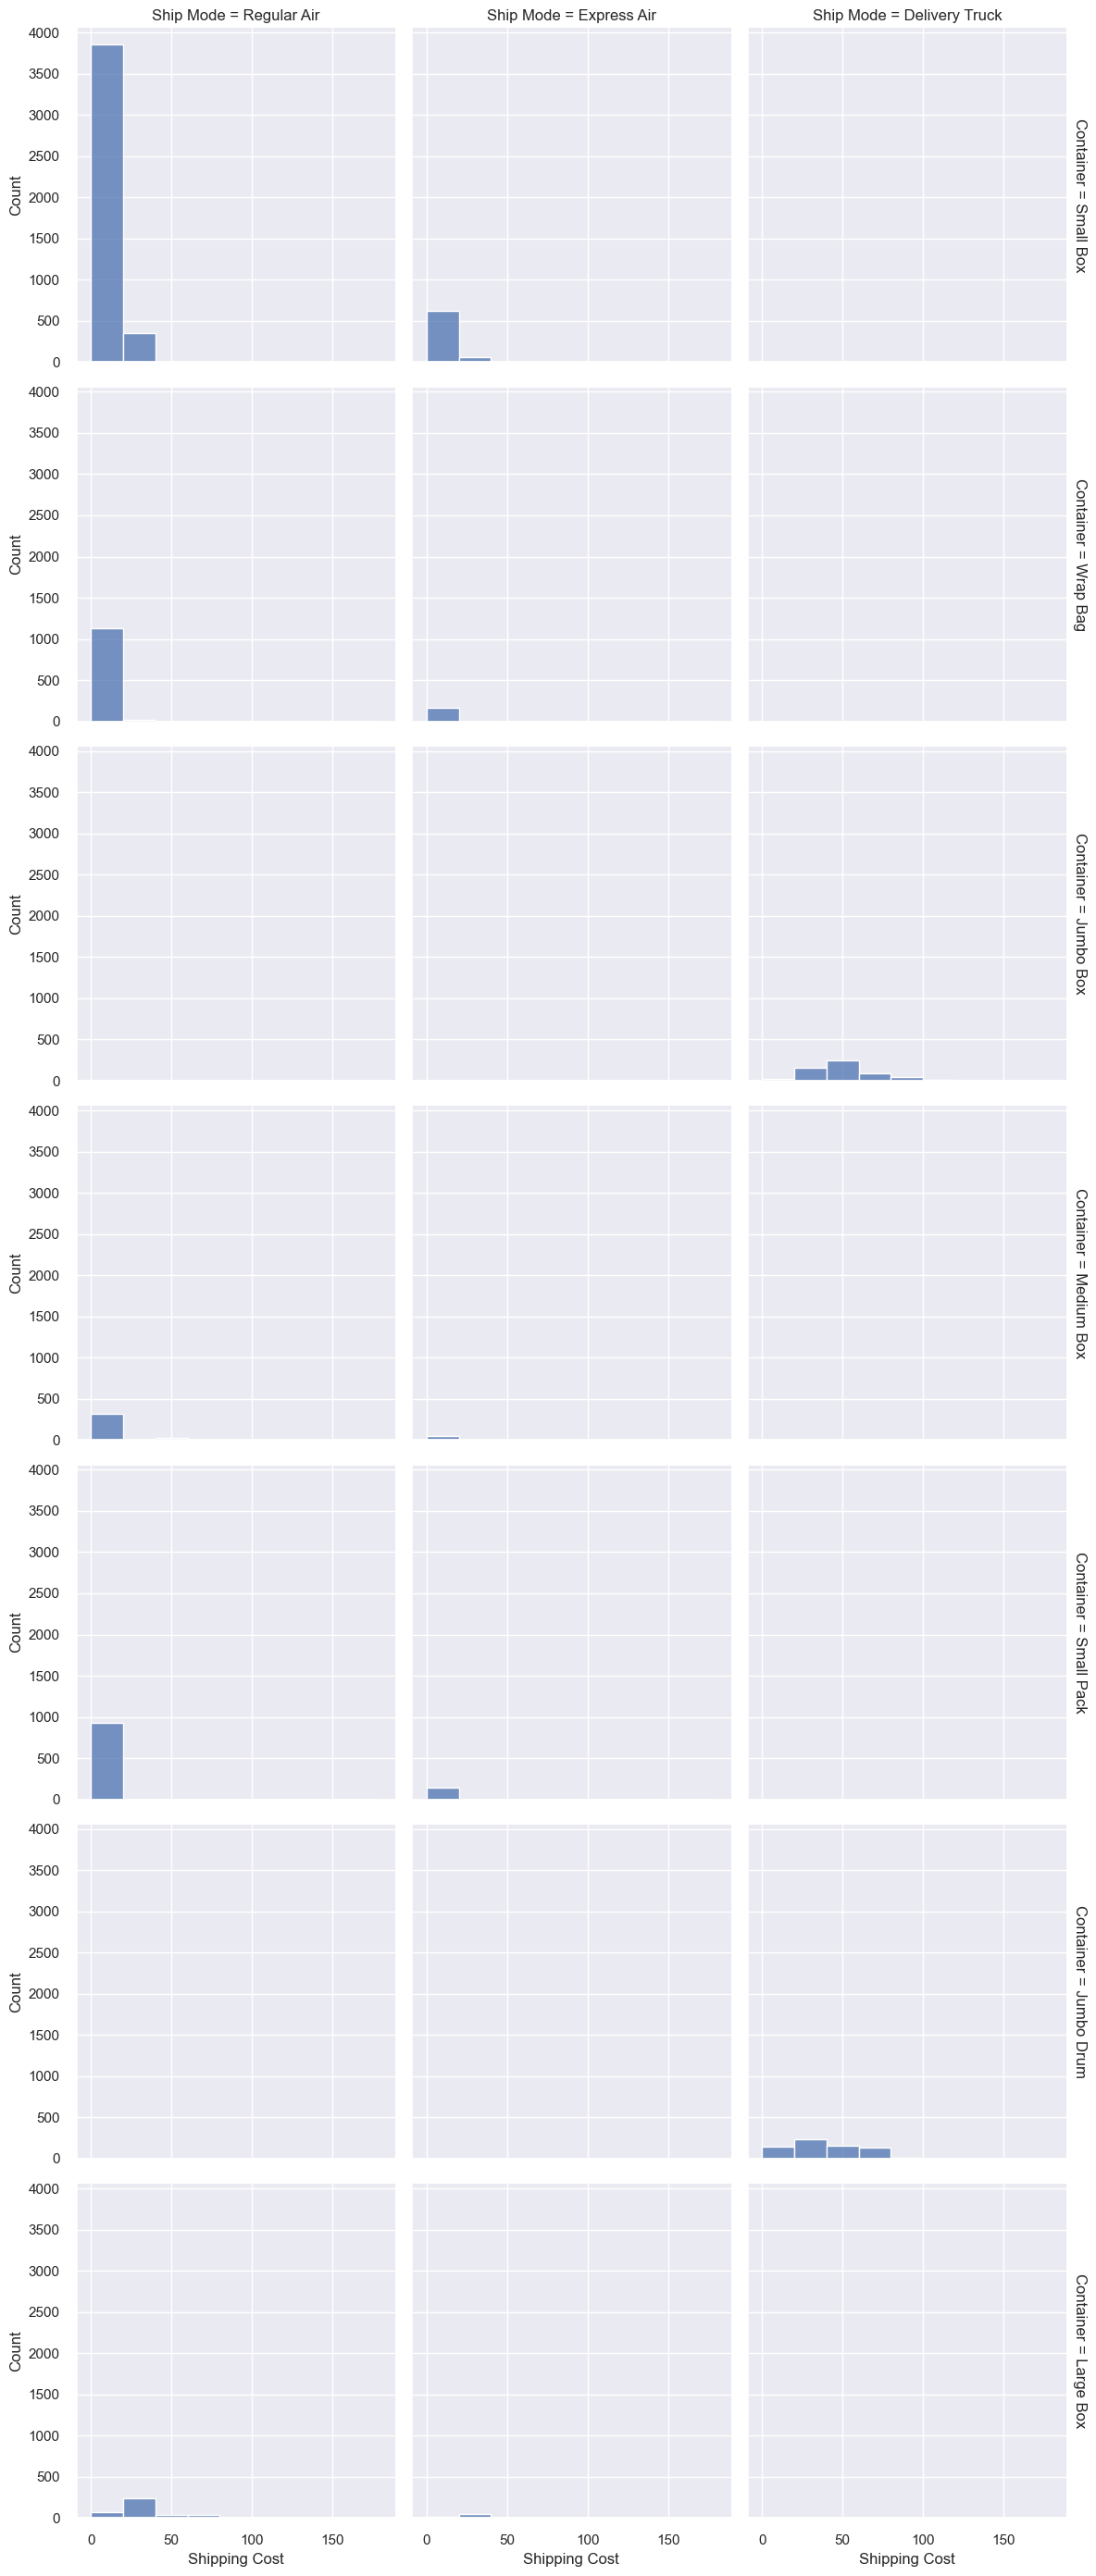

In [830]:
sn.set_theme(style="darkgrid")

sn.displot(
    df, x="Shipping Cost", col="Ship Mode", row="Container",
    binwidth=20, height=4, facet_kws=dict(margin_titles=True),
)

### The maximum number of items are shipped through Regular Air and are cheapest to ship.

### Wrap bags, Small box, Medium box and Large boxes are shipped via Regular air and Express Air and their shipping cost do not exceed 50

### Jumbo Box and Jumbo Drum are shipped through Delivery Truck and the shipping cost goes beyond 50

# Top 8 Profit generating products

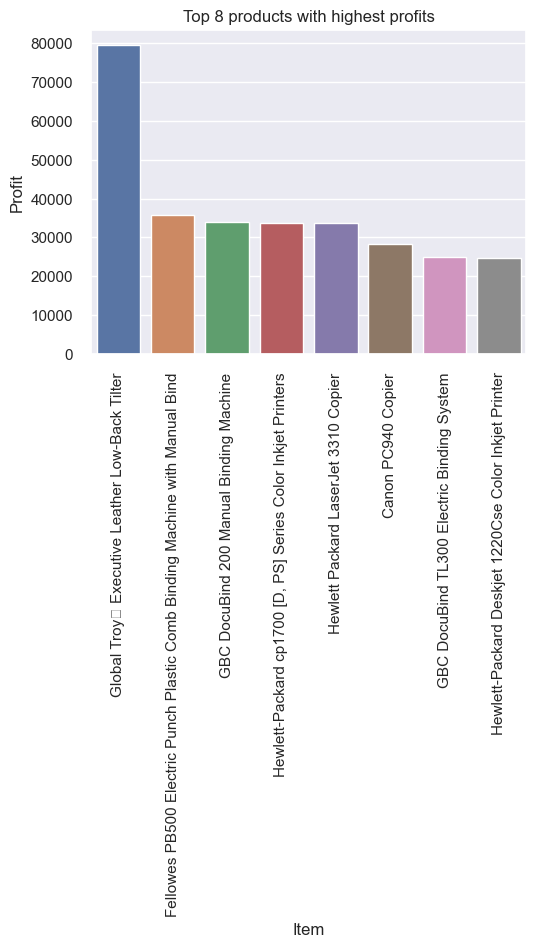

In [831]:
pro8_products = pd.DataFrame(df.groupby(['Item']).sum()['Profit'])
pro8_products.sort_values(by=['Profit'], inplace = True, ascending = False)
pro8_products.head(8)
f,ax=plt.subplots(figsize=(5,4))
sn.barplot(x='Item',y='Profit',data=pro8_products.head(8).reset_index(), ax=ax).set(title='Top 8 products with highest profits');
plt.xticks(rotation = 'vertical');


## What Items are being bought most?

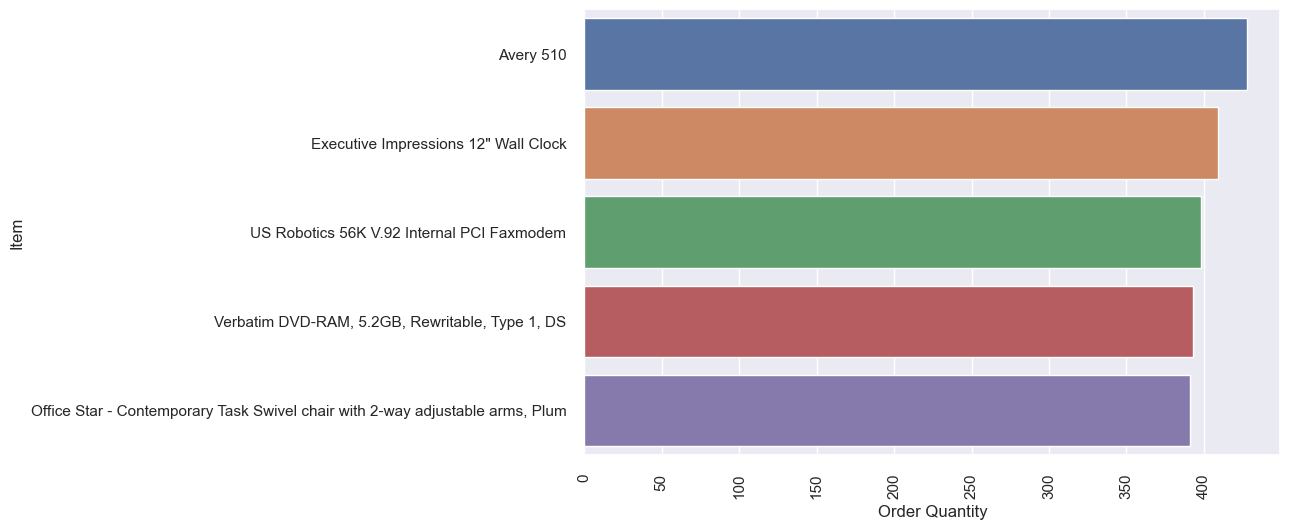

In [832]:
qty5_products = df.groupby('Item').agg({'Order Quantity': 'sum'}).sort_values('Order Quantity',ascending=False)[:5]

sn.barplot(x = 'Order Quantity', y = qty5_products.index, data = qty5_products)
plt.xticks(rotation = 'vertical');


## What Items are the least bought?

<AxesSubplot:xlabel='Order Quantity', ylabel='Item'>

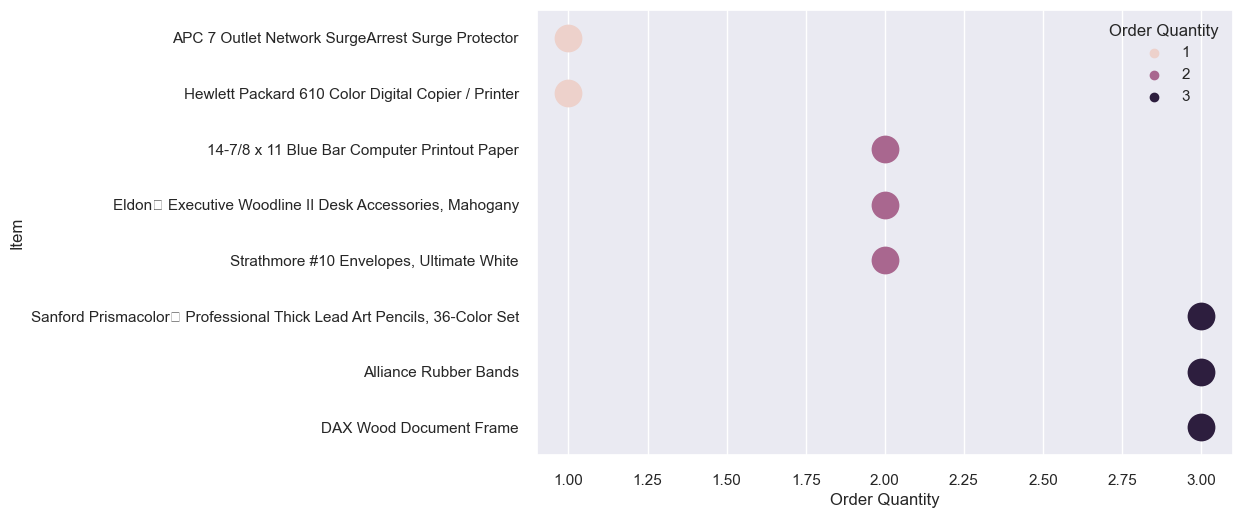

In [833]:
qty8l_products = df.groupby('Item').agg({'Order Quantity': 'sum'}).sort_values('Order Quantity',ascending=True)[:8]
qty8l_products

sn.stripplot(data=qty8l_products, x="Order Quantity",y=qty8l_products.index,size=20,hue='Order Quantity')


## 8 states performing highest in Sales

           State    Sales    SalesK
0  Massachusetts  1090616  $ 1091 K
1          Texas   998144   $ 998 K
2     California   975048   $ 975 K
3       New York   532726   $ 533 K
4        Florida   427410   $ 427 K
5       Michigan   324590   $ 325 K
6     Washington   298126   $ 298 K
7   Pennsylvania   297382   $ 297 K


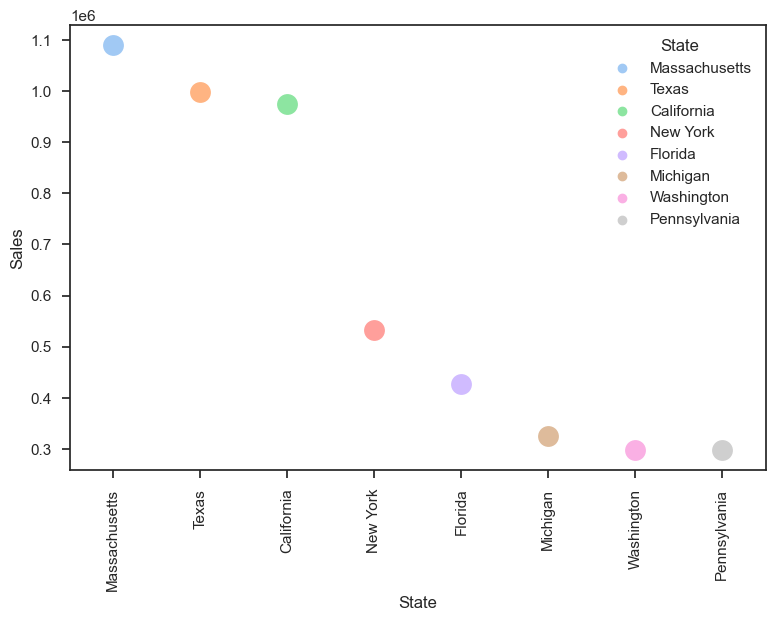

In [834]:

top8_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(8)
top8_state = top8_state.reset_index()
sn.set_theme(style="ticks", palette="pastel")

#Generating the labels which will show the sales value in K figure
top8_state['SalesK'] = ['$ '+str(round(int(v)/1000))+' K' for v in top8_state.Sales]
print(top8_state)

sn.swarmplot(data=top8_state, x= "State",y="Sales",hue="State",size=15)
plt.xticks(rotation='vertical');

## 8 states performing least in Sales

           State  Sales  SalesK
0       Delaware   3543   $ 4 K
1   North Dakota  17355  $ 17 K
2        Wyoming  18465  $ 18 K
3   Rhode Island  18484  $ 18 K
4         Nevada  20027  $ 20 K
5   South Dakota  33377  $ 33 K
6  West Virginia  37552  $ 38 K
7        Vermont  40127  $ 40 K


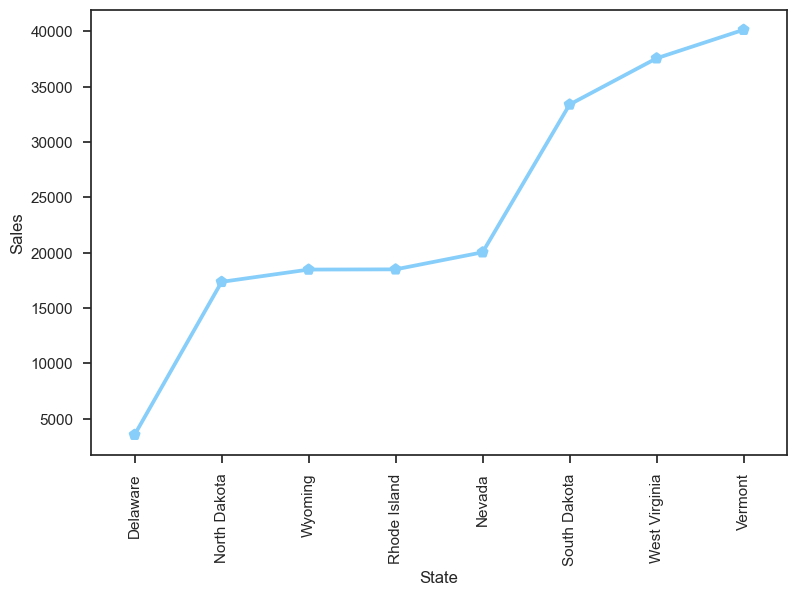

In [835]:
top8l_state = df.groupby('State')['Sales'].sum().sort_values(ascending=True).head(8)
top8l_state = top8l_state.reset_index()
sn.set_theme(style="ticks", palette="pastel")

#Generating the labels which will show the sales value in K figure
top8l_state['SalesK'] = ['$ '+str(round(int(v)/1000))+' K' for v in top8l_state.Sales]
print(top8l_state)

sn.pointplot(data=top8l_state, x="State", y="Sales",markers='p',color='lightskyblue')
plt.xticks(rotation='vertical');

## Top 8 performing cities in sales

            City   Sales   SalesK
0         Oxford  582583  $ 583 K
1         Boston  415304  $ 415 K
2         Irving  376895  $ 377 K
3    Los Angeles  359718  $ 360 K
4     Washington  218869  $ 219 K
5        Seattle  179569  $ 180 K
6          Miami  178427  $ 178 K
7  New York City  169799  $ 170 K


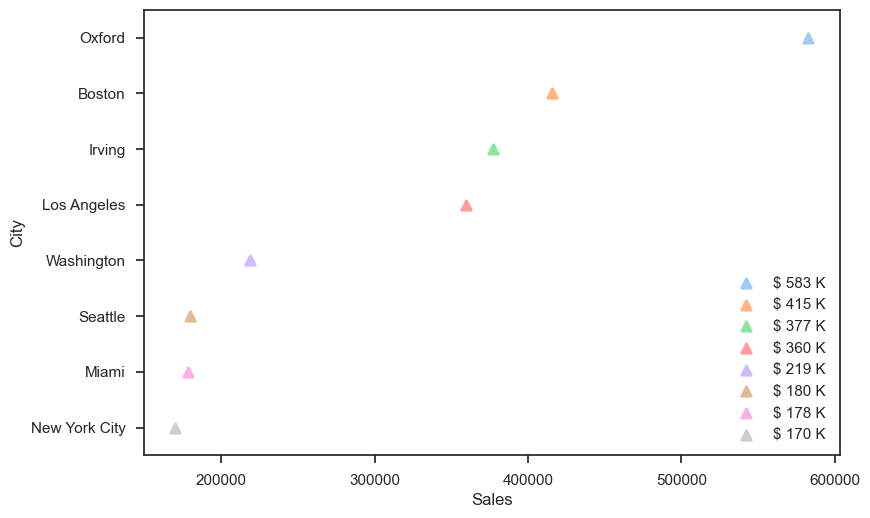

In [836]:
top8_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(8)
top8_city = top8_city.reset_index()

#Generating the labels which will show the sales value in K figure
top8_city['SalesK'] = ['$ '+str(round(int(v)/1000))+' K' for v in top8_city.Sales]
print(top8_city)

sn.pointplot(data=top8_city, x="Sales", y="City", hue='SalesK',markers='^')
plt.legend(loc="lower right")

## Least 8 performing cities in sales

          City  Sales SalesK
0       Kearny      3    $ 3
1   Rutherford      4    $ 4
2       Milton      7    $ 7
3    Waterford      8    $ 8
4  Newburyport     10   $ 10
5     Scituate     10   $ 10
6     Falmouth     11   $ 11
7  Willimantic     13   $ 13


<AxesSubplot:xlabel='Sales', ylabel='City'>

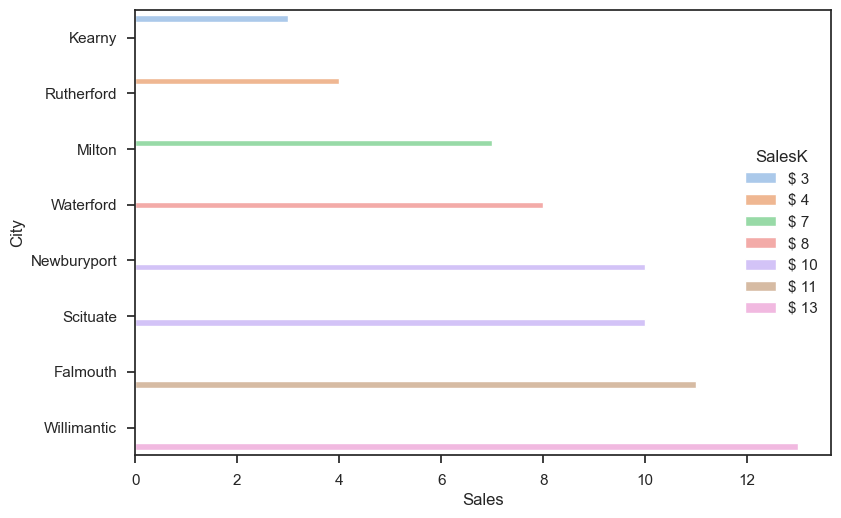

In [837]:
top8l_city = df.groupby('City')['Sales'].sum().sort_values(ascending=True).head(8)
top8l_city = top8l_city.reset_index()

#Generating the labels which will show the sales value in K figure
top8l_city['SalesK'] = ['$ '+str(round(int(v))) for v in top8l_city.Sales]
print(top8l_city)

sn.barplot(x=top8l_city["Sales"],y=top8l_city["City"],hue=top8l_city["SalesK"])

## Distribution of Discount vs Department

<AxesSubplot:xlabel='Discount', ylabel='Department'>

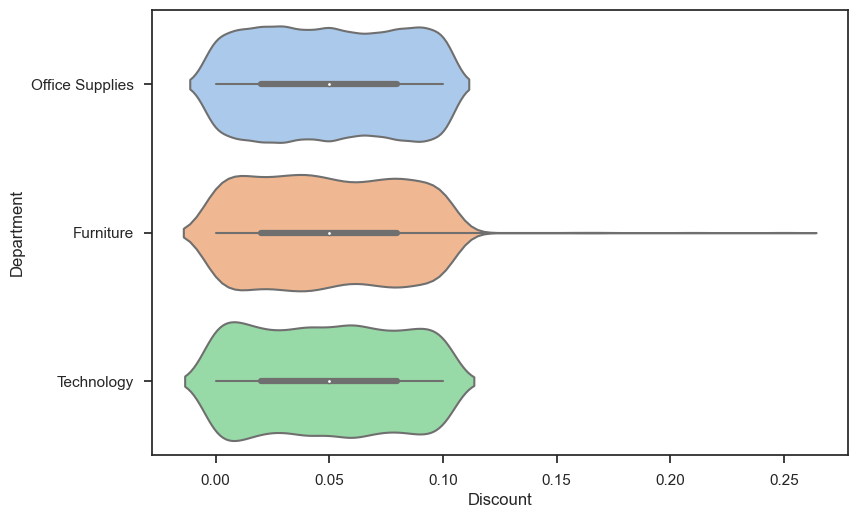

In [838]:
sn.violinplot(data=df, y="Department", x="Discount")

<AxesSubplot:xlabel='Profit', ylabel='Department'>

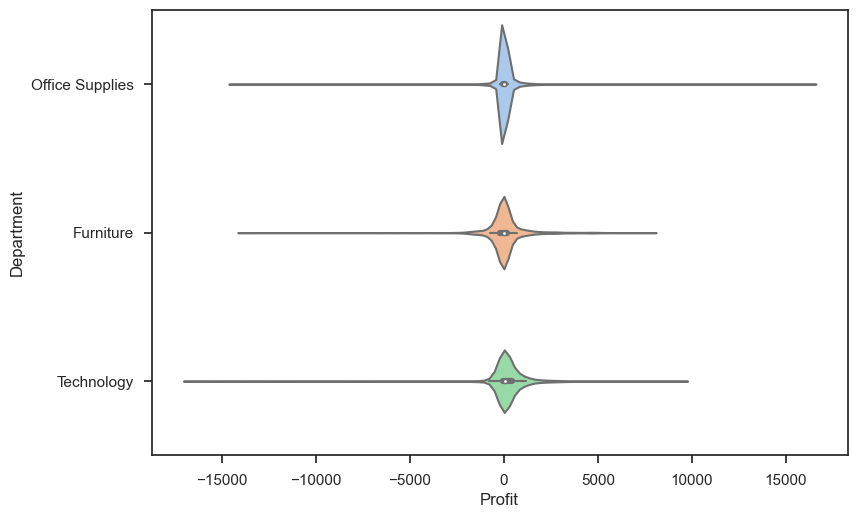

In [839]:
sn.violinplot(data=df, y="Department", x="Profit")

### As can be seen from these two graphs that furniture department is giving highest discounts but still not getting higher profits or can be inferred as since furniture department is showing less profits, it is giving higher discounts

## checking distribution of Sales

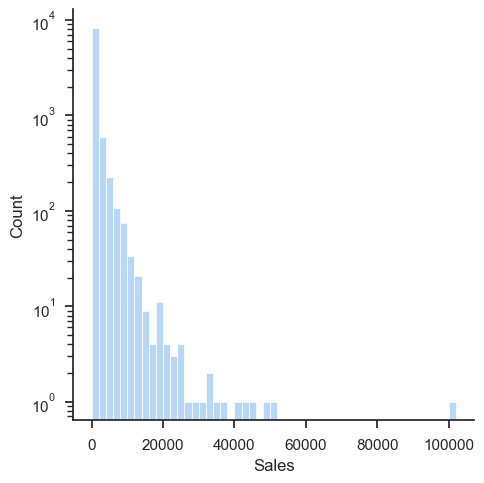

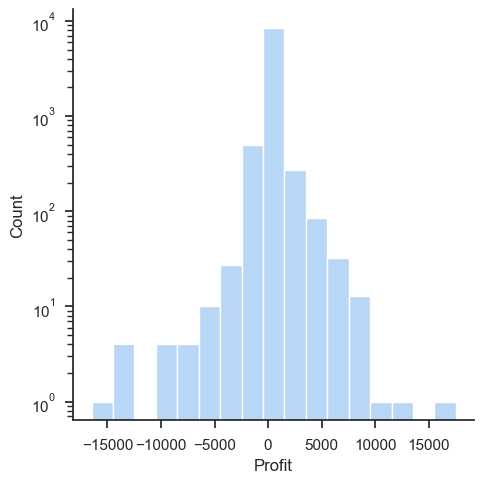

In [840]:
sn.displot(df, x="Sales", binwidth=2000,log=True)
sn.displot(df, x="Profit", binwidth=2000,log=True)


### Sales is an exponential distribution, where it can be seen only few items have sales greater than 23000.Profit on the other hand is a normal distribution where most of the values hover around -5000 to 5000 

In [841]:
df.Orderyear.min(),df.Orderyear.max()

(2014, 2017)

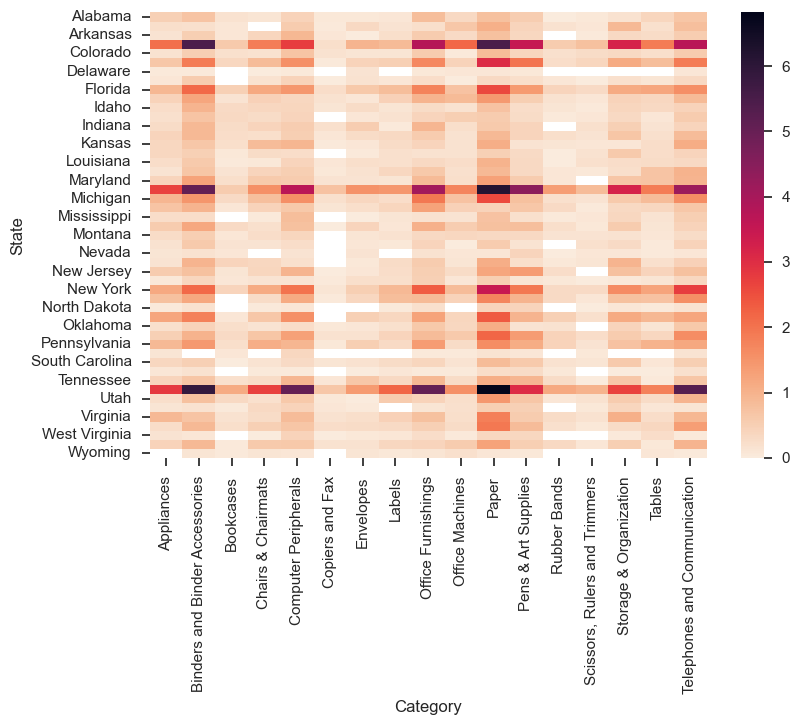

In [842]:
by_con_sm = pd.DataFrame(df.groupby(["State","Category"])["Discount"].agg(np.sum).reset_index(name='Discount'))
by_con_sm
sn.set_theme(style="ticks", palette="pastel")
cmap = sn.cm.rocket_r
by_con_sm = by_con_sm.pivot("State", "Category", "Discount")
ax = sn.heatmap(by_con_sm,cmap=cmap)


### Utah,Michigan and Colorado are giving more discounts on their products.Also paper and Binder and Binder accesories are the most discounted categories.

    Shipyear  Shipmonth  OrderQuantity
0       2016          1            314
1       2016          2            376
2       2016          3            341
3       2016          4            155
4       2016          5            311
5       2016          6            263
6       2016          7           3611
7       2016          8           4091
8       2016          9           4910
9       2016         10           4574
10      2016         11           5008
11      2016         12           5450
12      2017          1            402
13      2017          2             61
14      2017          3            107
15      2017          4             70
16      2017          5             85
17      2017          6              8
18      2017          7           7380
19      2017          8           7042
20      2017          9           9034
21      2017         10           7543
22      2017         11           7818
23      2017         12           7415
24      2018          1  

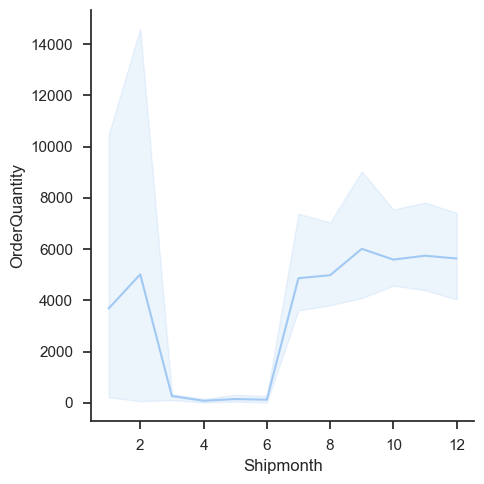

In [843]:
df['Ship Date'] = pd.to_datetime(df['Ship Date']) #Convert object into Datetime

df['Shipyear'] = df['Ship Date'].dt.year # creating year and month columns to play around with month and year separately.
df['Shipmonth'] = df['Ship Date'].dt.month
#print(df['Shipyear'].min(),df['Shipyear'].max(),df['Shipmonth'].min(),df['Shipmonth'].max())


df_temp = pd.DataFrame({'ShipDate':df['Ship Date'],'Shipyear':df['Shipyear'],'Shipmonth':df['Shipmonth'],'OrderDate':df['Order Date'],'Orderyear':df['Orderyear'],'Ordermonth':df['Ordermonth'],'OrderQuantity':df['Order Quantity'],'OrderPriority':df['Order Priority']})

sp_yr = df_temp.groupby(['Shipyear','Shipmonth'])['OrderQuantity'].sum().reset_index()
print(sp_yr)
sn.relplot(data=sp_yr, x="Shipmonth", y="OrderQuantity", kind="line")


### March to June shows low shipping numbers across the years.